# Problem Statement

__The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars__.

## Importing all necessary libraries

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from factor_analyzer import FactorAnalyzer

## Read the dataset

In [4]:
vehicleData = pd.read_csv('vehicle.csv')
vehicleData.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


## Check the Shape of the Dataset and the data types of each variable of the data set.

In [5]:
vehicleData.shape

(846, 19)

In [6]:
vehicleData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

## Get the summary of the dataset using descriptive statistics

In [7]:
vehicleData.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


## Check for Unique values in the `class` Variable

In [11]:
vehicleData['class'].unique()

array(['van', 'car', 'bus'], dtype=object)

## Check for null values

In [12]:
vehicleData.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

**There are multiple NA values with respect to each columns we will drop them**

## Drop the Null values

In [13]:
vehicleData.dropna(inplace=True)

## Check for duplicates

In [15]:
vehicleData.duplicated().sum()

0

# Uni-variate analysis


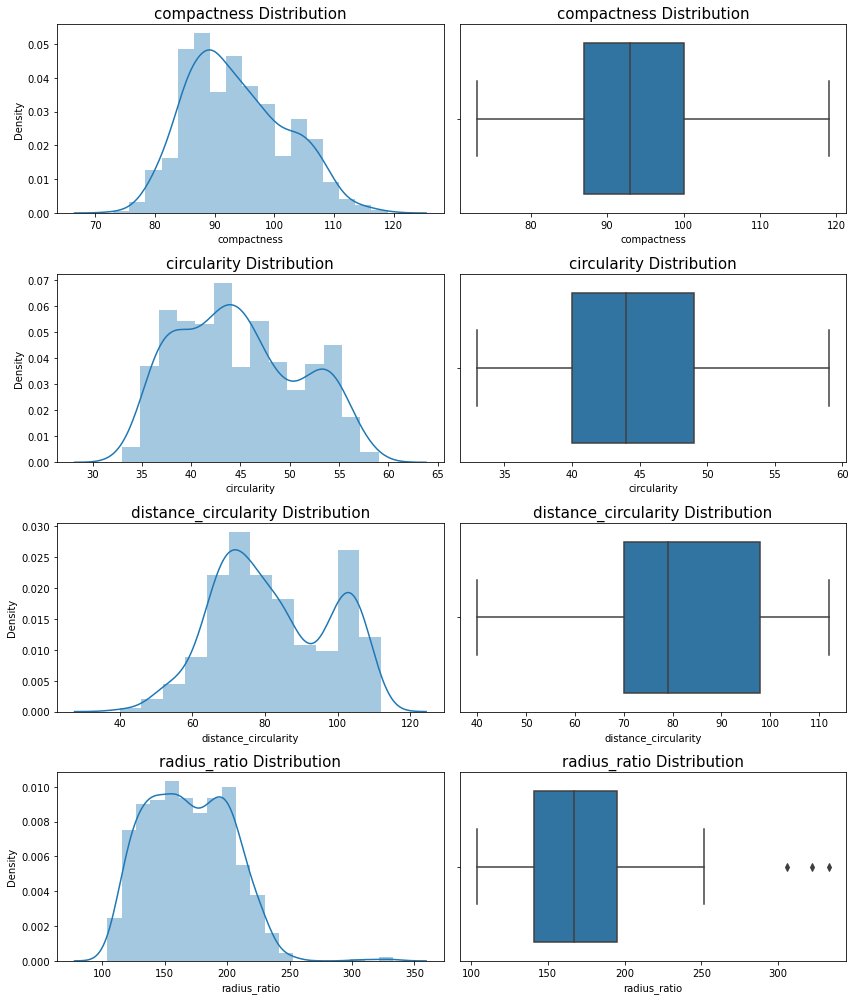

In [17]:
## Univariate except class column
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 14)
a = sns.distplot(vehicleData['compactness'] , ax=axes[0][0])
a.set_title("compactness Distribution",fontsize=15)
a = sns.boxplot(vehicleData['compactness'] , ax=axes[0][1])
a.set_title("compactness Distribution",fontsize=15)

a = sns.distplot(vehicleData['circularity'] , ax=axes[1][0])
a.set_title("circularity Distribution",fontsize=15)
a = sns.boxplot(vehicleData['circularity'] , ax=axes[1][1])
a.set_title("circularity Distribution",fontsize=15)

a = sns.distplot(vehicleData['distance_circularity'] , ax=axes[2][0])
a.set_title("distance_circularity Distribution",fontsize=15)
a = sns.boxplot(vehicleData['distance_circularity']  , ax=axes[2][1])
a.set_title("distance_circularity Distribution",fontsize=15)


a = sns.distplot(vehicleData['radius_ratio'] , ax=axes[3][0])
a.set_title("radius_ratio Distribution",fontsize=15)
a = sns.boxplot(vehicleData['radius_ratio']  , ax=axes[3][1])
a.set_title("radius_ratio Distribution",fontsize=15)

plt.tight_layout()
plt.show()

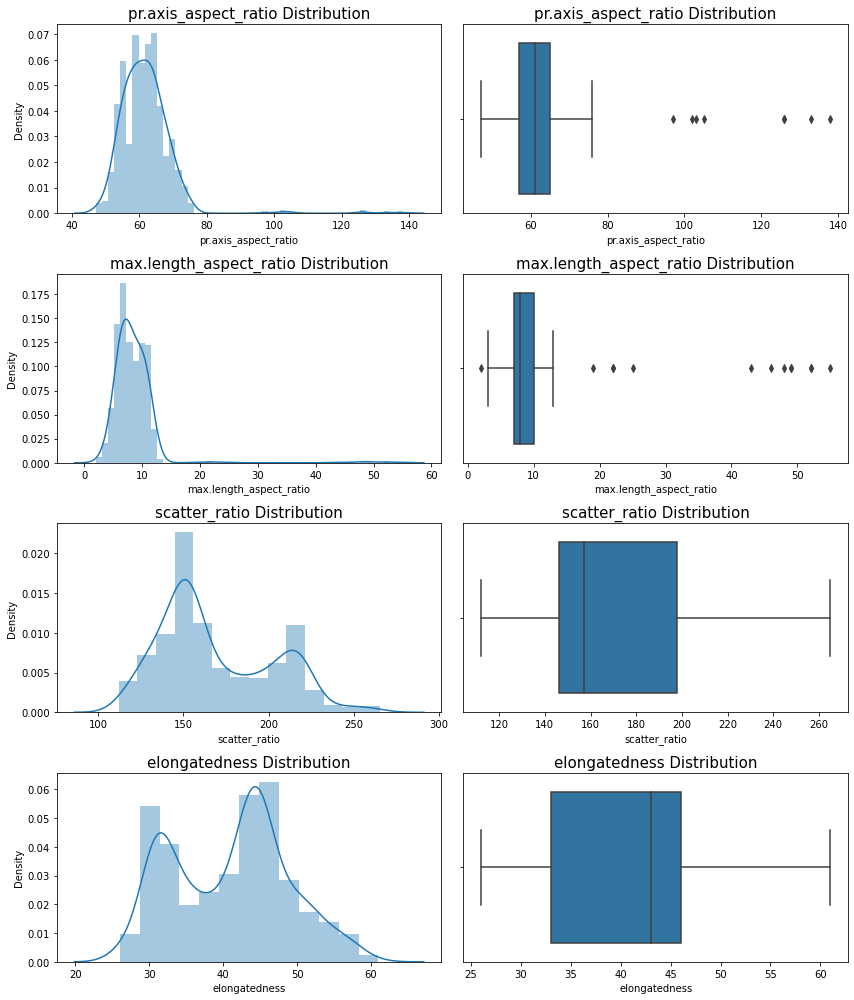

In [18]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 14)
a = sns.distplot(vehicleData['pr.axis_aspect_ratio'] , ax=axes[0][0])
a.set_title("pr.axis_aspect_ratio Distribution",fontsize=15)
a = sns.boxplot(vehicleData['pr.axis_aspect_ratio']  , ax=axes[0][1])
a.set_title("pr.axis_aspect_ratio Distribution",fontsize=15)

a = sns.distplot(vehicleData['max.length_aspect_ratio'] , ax=axes[1][0])
a.set_title("max.length_aspect_ratio Distribution",fontsize=15)
a = sns.boxplot(vehicleData['max.length_aspect_ratio']  , ax=axes[1][1])
a.set_title("max.length_aspect_ratio Distribution",fontsize=15)

a = sns.distplot(vehicleData['scatter_ratio'] , ax=axes[2][0])
a.set_title("scatter_ratio Distribution",fontsize=15)
a = sns.boxplot(vehicleData['scatter_ratio']  , ax=axes[2][1])
a.set_title("scatter_ratio Distribution",fontsize=15)


a = sns.distplot(vehicleData['elongatedness'] , ax=axes[3][0])
a.set_title("elongatedness Distribution",fontsize=15)
a = sns.boxplot(vehicleData['elongatedness']  , ax=axes[3][1])
a.set_title("elongatedness Distribution",fontsize=15)

plt.tight_layout()
plt.show()

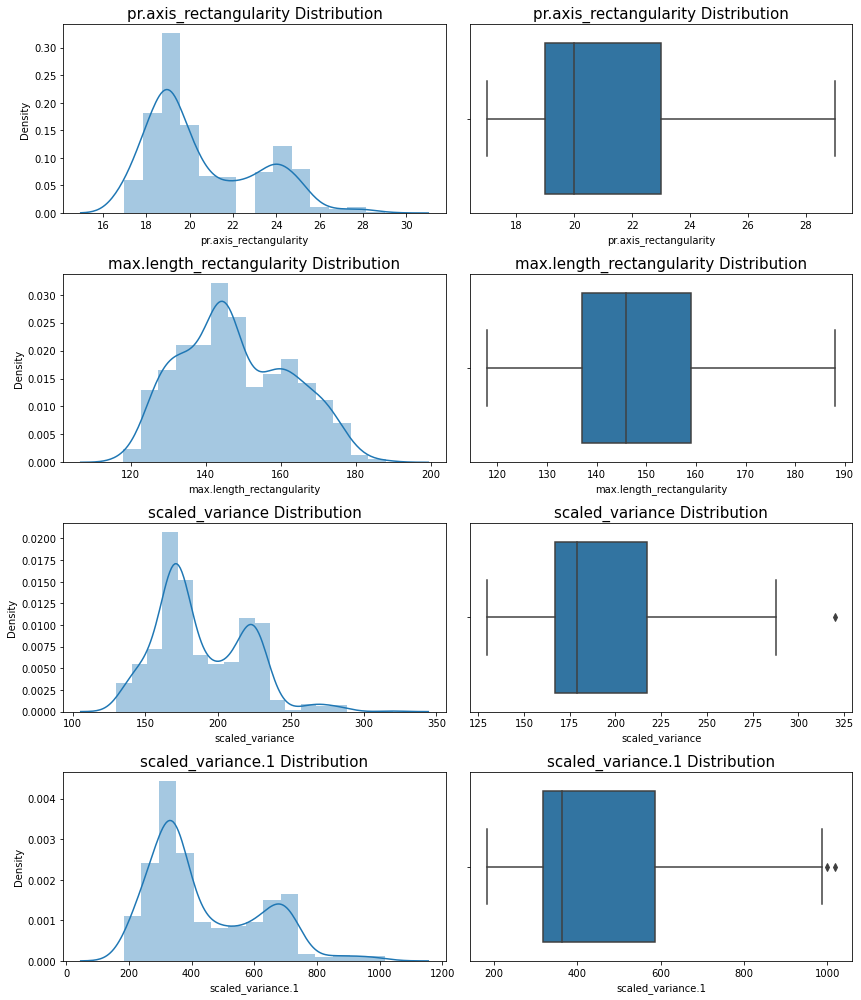

In [19]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 14)
a = sns.distplot(vehicleData['pr.axis_rectangularity'] , ax=axes[0][0])
a.set_title("pr.axis_rectangularity Distribution",fontsize=15)
a = sns.boxplot(vehicleData['pr.axis_rectangularity']  , ax=axes[0][1])
a.set_title("pr.axis_rectangularity Distribution",fontsize=15)

a = sns.distplot(vehicleData['max.length_rectangularity'] , ax=axes[1][0])
a.set_title("max.length_rectangularity Distribution",fontsize=15)
a = sns.boxplot(vehicleData['max.length_rectangularity']  , ax=axes[1][1])
a.set_title("max.length_rectangularity Distribution",fontsize=15)

a = sns.distplot(vehicleData['scaled_variance'] , ax=axes[2][0])
a.set_title("scaled_variance Distribution",fontsize=15)
a = sns.boxplot(vehicleData['scaled_variance']  , ax=axes[2][1])
a.set_title("scaled_variance Distribution",fontsize=15)


a = sns.distplot(vehicleData['scaled_variance.1'] , ax=axes[3][0])
a.set_title("scaled_variance.1 Distribution",fontsize=15)
a = sns.boxplot(vehicleData['scaled_variance.1']  , ax=axes[3][1])
a.set_title("scaled_variance.1 Distribution",fontsize=15)

plt.tight_layout()
plt.show()

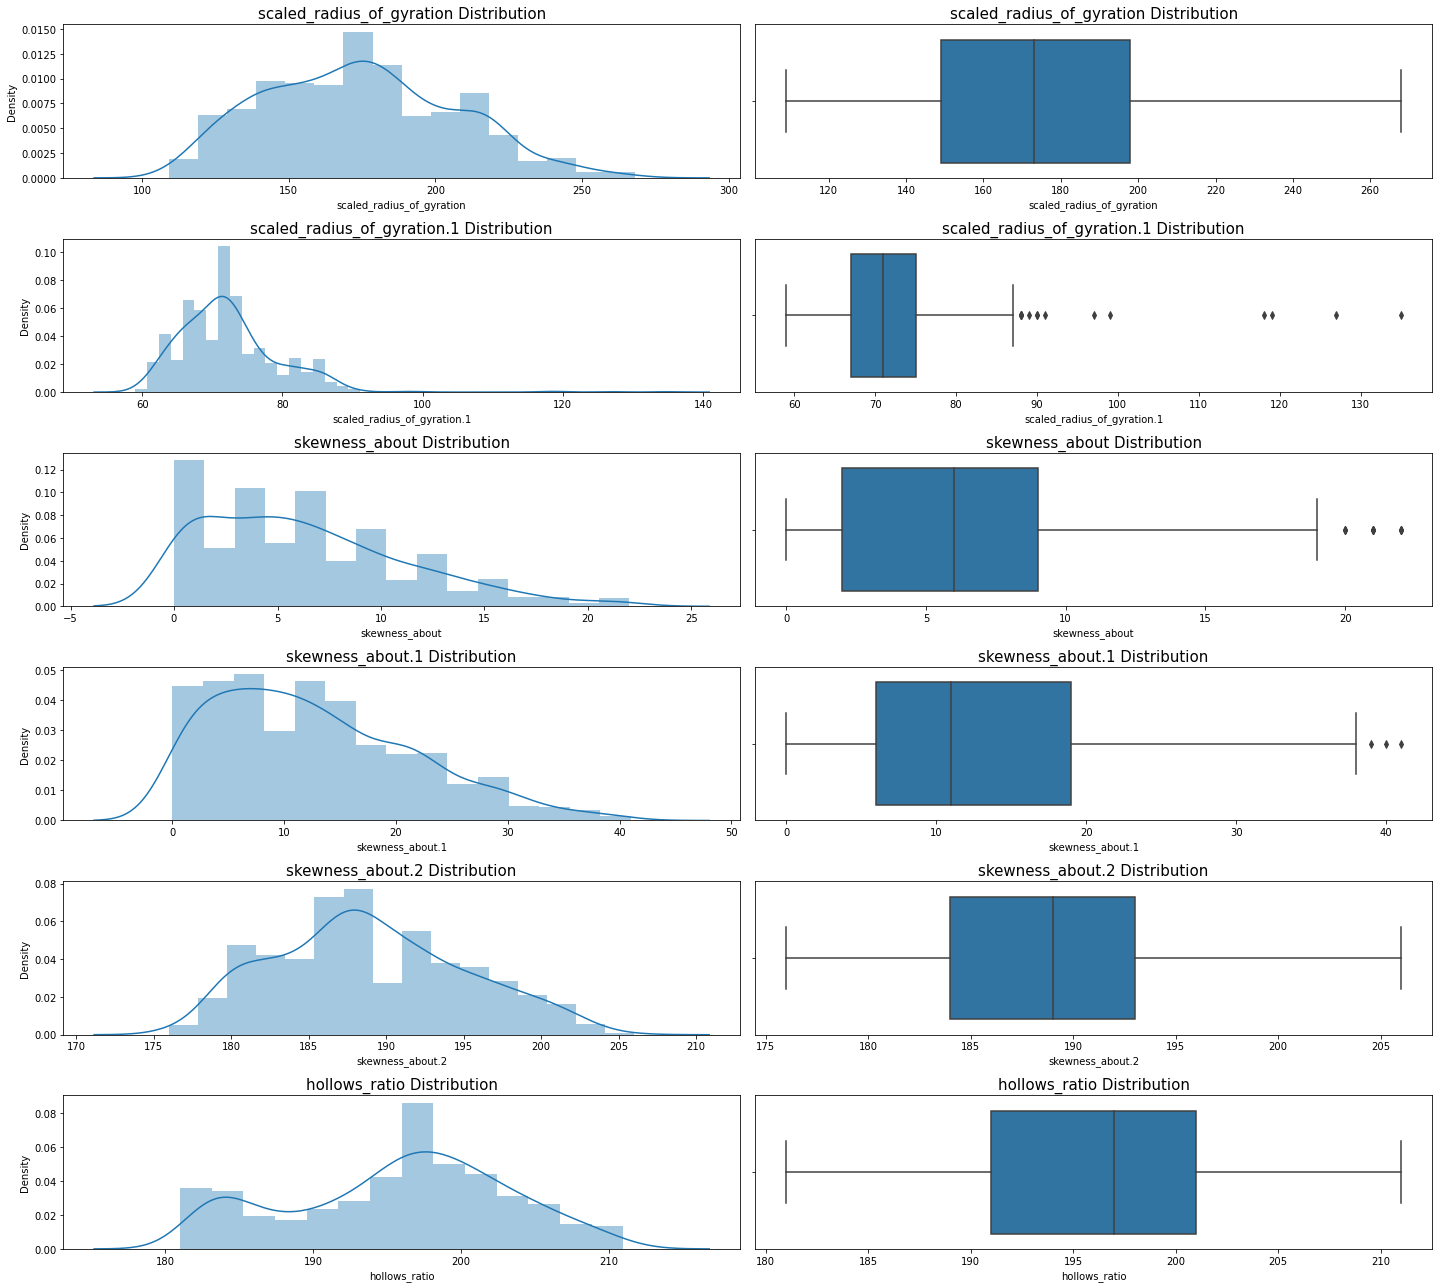

In [20]:
fig, axes = plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(20, 18)
a = sns.distplot(vehicleData['scaled_radius_of_gyration'] , ax=axes[0][0])
a.set_title("scaled_radius_of_gyration Distribution",fontsize=15)
a = sns.boxplot(vehicleData['scaled_radius_of_gyration']  , ax=axes[0][1])
a.set_title("scaled_radius_of_gyration Distribution",fontsize=15)

a = sns.distplot(vehicleData['scaled_radius_of_gyration.1'] , ax=axes[1][0])
a.set_title("scaled_radius_of_gyration.1 Distribution",fontsize=15)
a = sns.boxplot(vehicleData['scaled_radius_of_gyration.1']  , ax=axes[1][1])
a.set_title("scaled_radius_of_gyration.1 Distribution",fontsize=15)

a = sns.distplot(vehicleData['skewness_about'] , ax=axes[2][0])
a.set_title("skewness_about Distribution",fontsize=15)
a = sns.boxplot(vehicleData['skewness_about']  , ax=axes[2][1])
a.set_title("skewness_about Distribution",fontsize=15)


a = sns.distplot(vehicleData['skewness_about.1'] , ax=axes[3][0])
a.set_title("skewness_about.1 Distribution",fontsize=15)
a = sns.boxplot(vehicleData['skewness_about.1']  , ax=axes[3][1])
a.set_title("skewness_about.1 Distribution",fontsize=15)


a = sns.distplot(vehicleData['skewness_about.2'] , ax=axes[4][0])
a.set_title("skewness_about.2 Distribution",fontsize=15)
a = sns.boxplot(vehicleData['skewness_about.2']  , ax=axes[4][1])
a.set_title("skewness_about.2 Distribution",fontsize=15)

a = sns.distplot(vehicleData['hollows_ratio'] , ax=axes[5][0])
a.set_title("hollows_ratio Distribution",fontsize=15)
a = sns.boxplot(vehicleData['hollows_ratio']  , ax=axes[5][1])
a.set_title("hollows_ratio Distribution",fontsize=15)

plt.tight_layout()
plt.show()

**We observe from the plots that the following variables have outliers - radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scaled_variance,scaled_variance.1,scaled_radius_of_gyration.1,skewness_about,skewness_about.1**


# Bi- Variate Analysis:

### Check for correlation of variable

In [24]:
vehicleData.corr()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1.000000,0.689885,0.789955,0.688130,0.090557,0.150369,0.814026,-0.788051,0.814227,0.674902,0.764386,0.820240,0.581405,-0.258437,0.231648,0.168384,0.296195,0.372806
circularity,0.689885,1.000000,0.797704,0.623950,0.155023,0.251619,0.858149,-0.825108,0.856137,0.965366,0.806108,0.850932,0.935594,0.049070,0.141726,-0.001975,-0.113902,0.049331
distance_circularity,0.789955,0.797704,1.000000,0.771404,0.163386,0.265591,0.909023,-0.912713,0.897261,0.773459,0.865683,0.891789,0.705689,-0.238145,0.110280,0.277851,0.145258,0.343228
radius_ratio,0.688130,0.623950,0.771404,1.000000,0.667375,0.452460,0.743470,-0.795761,0.716210,0.570478,0.806788,0.731773,0.544636,-0.175348,0.044693,0.178079,0.375591,0.470895
pr.axis_aspect_ratio,0.090557,0.155023,0.163386,0.667375,1.000000,0.652093,0.113696,-0.191193,0.086992,0.133553,0.290375,0.100668,0.135663,0.173060,-0.059244,-0.040769,0.229702,0.257566
max.length_aspect_ratio,0.150369,0.251619,0.265591,0.452460,0.652093,1.000000,0.171445,-0.183242,0.167514,0.309180,0.331124,0.150069,0.197179,0.308329,0.016461,0.041210,-0.030543,0.139283
scatter_ratio,0.814026,0.858149,0.909023,0.743470,0.113696,0.171445,1.000000,-0.973413,0.991992,0.808154,0.950067,0.996396,0.795748,-0.045632,0.070118,0.227375,0.009967,0.138424
elongatedness,-0.788051,-0.825108,-0.912713,-0.795761,-0.191193,-0.183242,-0.973413,1.000000,-0.950345,-0.771099,-0.937846,-0.956858,-0.761563,0.119750,-0.046621,-0.201325,-0.117568,-0.233408
pr.axis_rectangularity,0.814227,0.856137,0.897261,0.716210,0.086992,0.167514,0.991992,-0.950345,1.000000,0.811979,0.935653,0.992119,0.792895,-0.033769,0.078701,0.231171,-0.017383,0.117202
max.length_rectangularity,0.674902,0.965366,0.773459,0.570478,0.133553,0.309180,0.808154,-0.771099,0.811979,1.000000,0.744760,0.796230,0.865240,0.031098,0.130356,0.013045,-0.108019,0.086792


### Plot the correlation coefficients as a heatmap

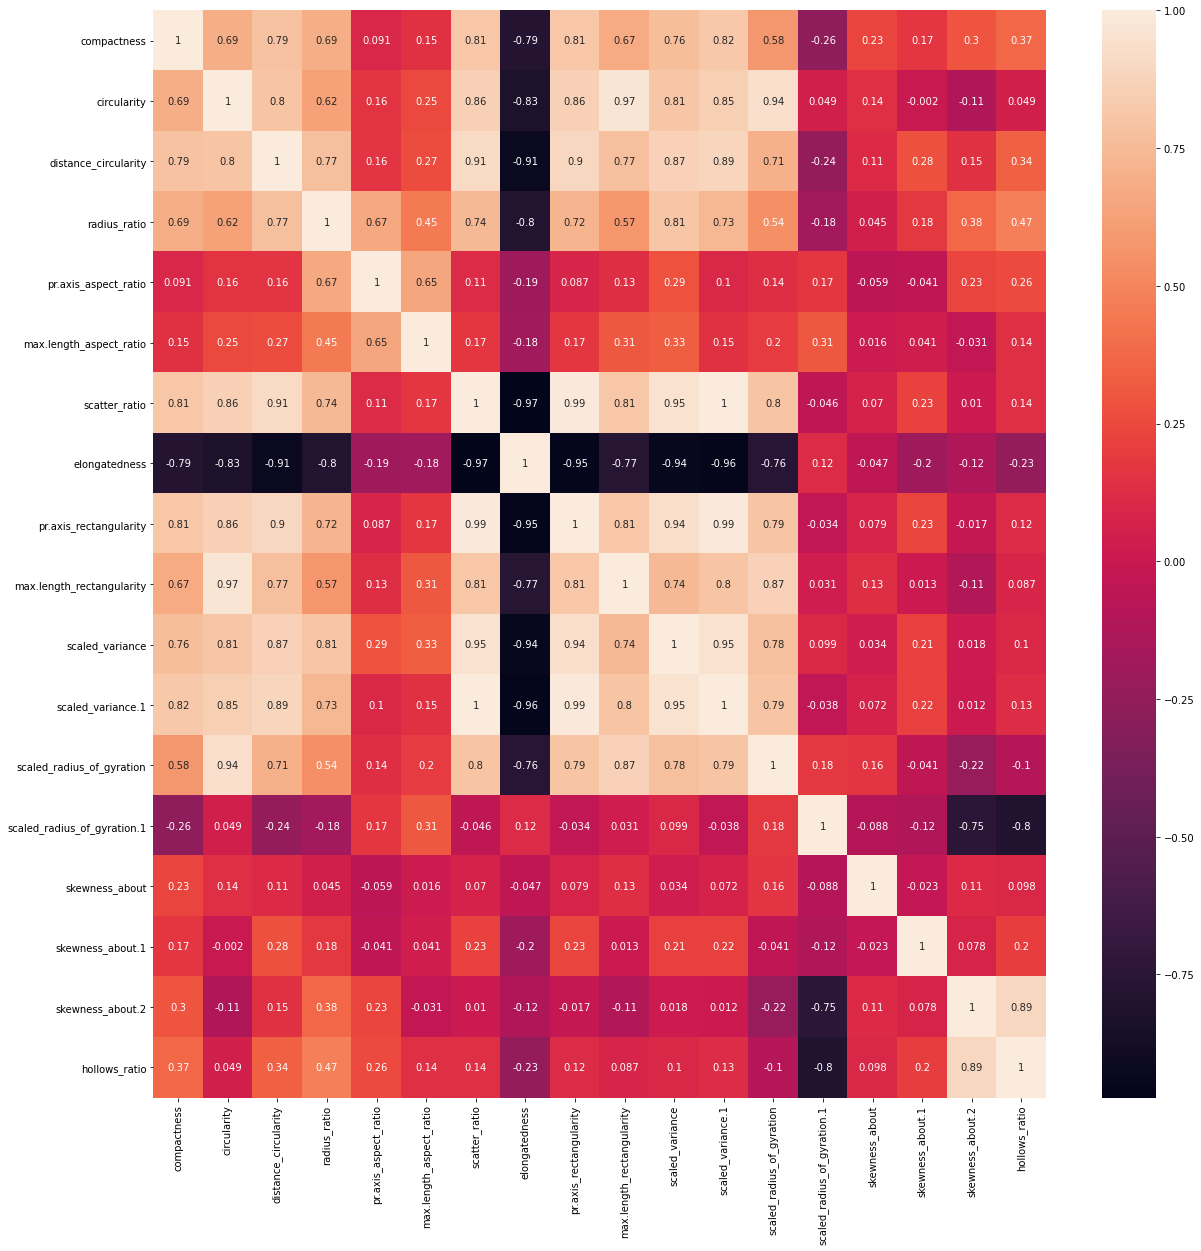

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(vehicleData.corr(),annot=True)
plt.show()

# Outlier Check & Treatment

## Outlier Check using Boxplot

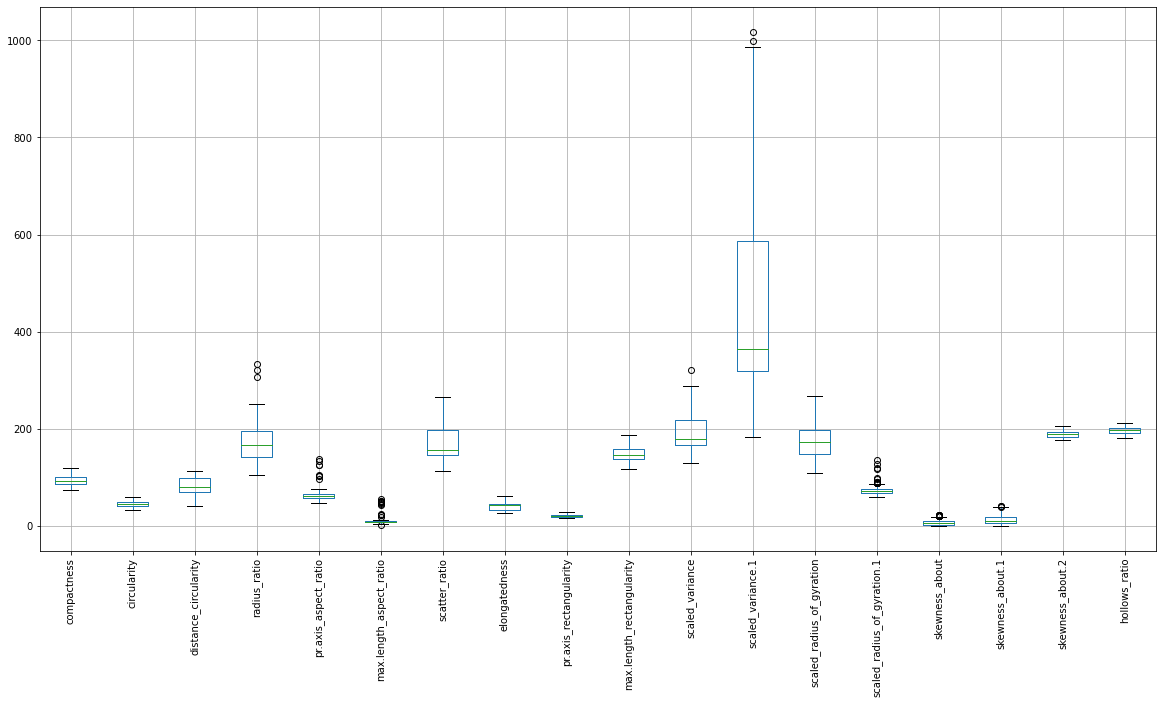

In [26]:
vehicleData.boxplot(figsize=(20,10))
plt.xticks(rotation=90)
plt.show()

**we observe that the same columns have outliers, let us try to handle them by using custom function**

## Outlier treatment :  define a custom function- If for a particular column the max value is greater than that assign max value,same logic for min value

In [28]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [30]:
lratio,uratio=remove_outlier(vehicleData['radius_ratio'])
vehicleData['radius_ratio']=np.where(vehicleData['radius_ratio']>uratio,uratio,vehicleData['radius_ratio'])
vehicleData['radius_ratio']=np.where(vehicleData['radius_ratio']<lratio,lratio,vehicleData['radius_ratio'])

lraxis,uraxis=remove_outlier(vehicleData['pr.axis_aspect_ratio'])
vehicleData['pr.axis_aspect_ratio']=np.where(vehicleData['pr.axis_aspect_ratio']>uraxis,uraxis,vehicleData['pr.axis_aspect_ratio'])
vehicleData['pr.axis_aspect_ratio']=np.where(vehicleData['pr.axis_aspect_ratio']<lraxis,lraxis,vehicleData['pr.axis_aspect_ratio'])

lraspect,uraspect=remove_outlier(vehicleData['max.length_aspect_ratio'])
vehicleData['max.length_aspect_ratio']=np.where(vehicleData['max.length_aspect_ratio']>uraspect,uraspect,vehicleData['max.length_aspect_ratio'])
vehicleData['max.length_aspect_ratio']=np.where(vehicleData['max.length_aspect_ratio']<lraspect,lraspect,vehicleData['max.length_aspect_ratio'])

lrscaled_var,urscaled_var=remove_outlier(vehicleData['scaled_variance'])
vehicleData['scaled_variance']=np.where(vehicleData['scaled_variance']>urscaled_var,urscaled_var,vehicleData['scaled_variance'])
vehicleData['scaled_variance']=np.where(vehicleData['scaled_variance']<lrscaled_var,lrscaled_var,vehicleData['scaled_variance'])

lrscal_Var1,urscal_Var1=remove_outlier(vehicleData['scaled_variance.1'])
vehicleData['scaled_variance.1']=np.where(vehicleData['scaled_variance.1']>urscal_Var1,urscal_Var1,vehicleData['scaled_variance.1'])
vehicleData['scaled_variance.1']=np.where(vehicleData['scaled_variance.1']<lrscal_Var1,lrscal_Var1,vehicleData['scaled_variance.1'])

lradius_gyration,uradius_gyration=remove_outlier(vehicleData['scaled_radius_of_gyration.1'])
vehicleData['scaled_radius_of_gyration.1']=np.where(vehicleData['scaled_radius_of_gyration.1']>uradius_gyration,uradius_gyration,vehicleData['scaled_radius_of_gyration.1'])
vehicleData['scaled_radius_of_gyration.1']=np.where(vehicleData['scaled_radius_of_gyration.1']<lradius_gyration,lradius_gyration,vehicleData['scaled_radius_of_gyration.1'])


lSkew,uSkew=remove_outlier(vehicleData['skewness_about'])
vehicleData['skewness_about']=np.where(vehicleData['skewness_about']>uSkew,uSkew,vehicleData['skewness_about'])
vehicleData['skewness_about']=np.where(vehicleData['skewness_about']<lSkew,lSkew,vehicleData['skewness_about'])

lSkew1,uSkew1=remove_outlier(vehicleData['skewness_about.1'])
vehicleData['skewness_about.1']=np.where(vehicleData['skewness_about.1']>uSkew1,uSkew1,vehicleData['skewness_about.1'])
vehicleData['skewness_about.1']=np.where(vehicleData['skewness_about.1']<lSkew1,lSkew1,vehicleData['skewness_about.1'])

## Plotting Boxplot after outlier treatment

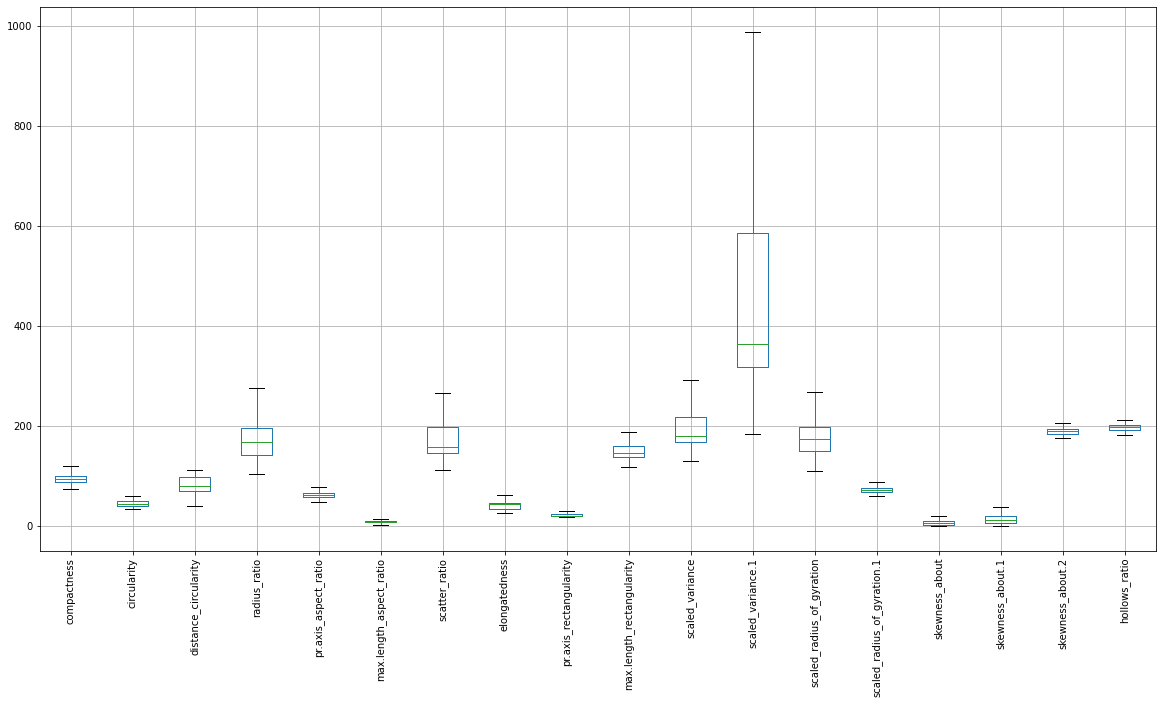

In [31]:
vehicleData.boxplot(figsize=(20,10))
plt.xticks(rotation=90)
plt.show()

# PCA

**PCA is a statistical technique and uses orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables. PCA also is a tool to reduce multidimensional data to lower dimensions while retaining most of the information. Principal Component Analysis (PCA) is a well-established mathematical technique for reducing the dimensionality of data, while keeping as much variation as possible.**

**This PCA can only be done on continuous variables**

## Drop Class column

In [32]:
new_df = vehicleData.drop(columns=['class'])

## Use zscore scaling on the data.

In [35]:
new_df_Scalled = new_df.apply(zscore)

### Plot boxplots after scaling the data.

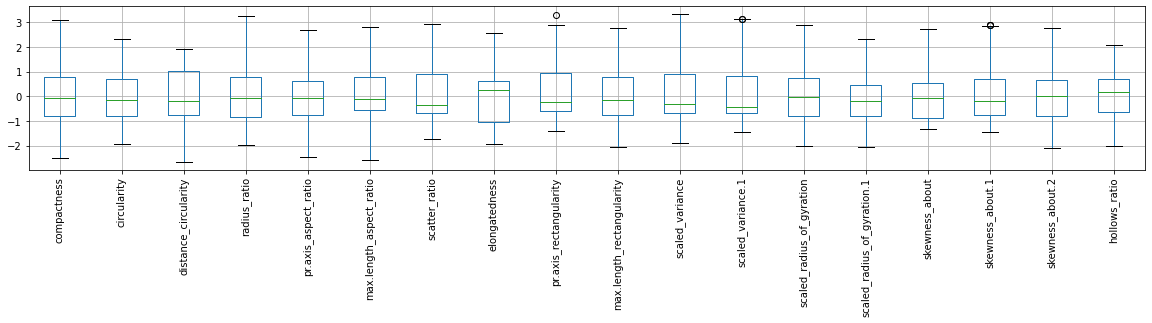

In [36]:
new_df_Scalled.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()

## Create a covariance matrix for identifying Principal components

In [38]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = np.cov(new_df_Scalled.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00123153  0.69073497  0.79092746  0.70377796  0.16788275  0.44946469
   0.81502868 -0.78902127  0.81522961  0.67573322  0.7684976   0.82140686
   0.58212123 -0.2752691   0.22944245  0.16862872  0.29656022  0.3732647 ]
 [ 0.69073497  1.00123153  0.79868656  0.63492543  0.20053277  0.52972719
   0.85920548 -0.8261242   0.85719089  0.96655501  0.81009539  0.85214389
   0.93674669  0.05333274  0.14221546 -0.00160688 -0.1140426   0.04939203]
 [ 0.79092746  0.79868656  1.00123153  0.78661123  0.2370389   0.62072353
   0.91014241 -0.9138366   0.89836576  0.77441118  0.87018356  0.89327918
   0.70655787 -0.26354646  0.10975518  0.27833298  0.14543699  0.34365085]
 [ 0.70377796  0.63492543  0.78661123  1.00123153  0.68697896  0.50201311
   0.76083438 -0.81368373  0.73340135  0.57884146  0.80904795  0.7498534
   0.55409982 -0.32850547  0.04513501  0.18220311  0.3858339   0.48124398]
 [ 0.16788275  0.20053277  0.2370389   0.68697896  1.00123153  0.22780935
   0.1884992 

## Comparing the Correlation Matrix with and without scaling the data.

In [39]:
# Now without Scaling lets check out correlation matrix
df_corr = new_df.copy()
df_corr.corr()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1.000000,0.689885,0.789955,0.702912,0.167676,0.448912,0.814026,-0.788051,0.814227,0.674902,0.767552,0.820397,0.581405,-0.274931,0.229160,0.168421,0.296195,0.372806
circularity,0.689885,1.000000,0.797704,0.634144,0.200286,0.529076,0.858149,-0.825108,0.856137,0.965366,0.809099,0.851096,0.935594,0.053267,0.142041,-0.001605,-0.113902,0.049331
distance_circularity,0.789955,0.797704,1.000000,0.785644,0.236747,0.619960,0.909023,-0.912713,0.897261,0.773459,0.869113,0.892180,0.705689,-0.263222,0.109620,0.277991,0.145258,0.343228
radius_ratio,0.702912,0.634144,0.785644,1.000000,0.686134,0.501396,0.759899,-0.812683,0.732499,0.578129,0.808053,0.748931,0.553418,-0.328101,0.045079,0.181979,0.385359,0.480652
pr.axis_aspect_ratio,0.167676,0.200286,0.236747,0.686134,1.000000,0.227529,0.188267,-0.288500,0.154253,0.158370,0.259671,0.174951,0.166516,-0.231624,-0.058149,-0.038356,0.358833,0.379987
max.length_aspect_ratio,0.448912,0.529076,0.619960,0.501396,0.227529,1.000000,0.456077,-0.468937,0.453606,0.619712,0.436693,0.419539,0.390697,-0.253962,0.088058,0.128494,0.050907,0.370434
scatter_ratio,0.814026,0.858149,0.909023,0.759899,0.188267,0.456077,1.000000,-0.973413,0.991992,0.808154,0.954516,0.996483,0.795748,-0.033193,0.069513,0.227595,0.009967,0.138424
elongatedness,-0.788051,-0.825108,-0.912713,-0.812683,-0.288500,-0.468937,-0.973413,1.000000,-0.950345,-0.771099,-0.942073,-0.957181,-0.761563,0.121895,-0.046400,-0.201445,-0.117568,-0.233408
pr.axis_rectangularity,0.814227,0.856137,0.897261,0.732499,0.154253,0.453606,0.991992,-0.950345,1.000000,0.811979,0.940258,0.992119,0.792895,-0.016989,0.077985,0.231361,-0.017383,0.117202
max.length_rectangularity,0.674902,0.965366,0.773459,0.578129,0.158370,0.619712,0.808154,-0.771099,0.811979,1.000000,0.747346,0.796457,0.865240,0.031877,0.130685,0.013441,-0.108019,0.086792


In [40]:
#With standardisation (Without standardisation also, correlation matrix yields same result)
new_df_Scalled.corr()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1.000000,0.689885,0.789955,0.702912,0.167676,0.448912,0.814026,-0.788051,0.814227,0.674902,0.767552,0.820397,0.581405,-0.274931,0.229160,0.168421,0.296195,0.372806
circularity,0.689885,1.000000,0.797704,0.634144,0.200286,0.529076,0.858149,-0.825108,0.856137,0.965366,0.809099,0.851096,0.935594,0.053267,0.142041,-0.001605,-0.113902,0.049331
distance_circularity,0.789955,0.797704,1.000000,0.785644,0.236747,0.619960,0.909023,-0.912713,0.897261,0.773459,0.869113,0.892180,0.705689,-0.263222,0.109620,0.277991,0.145258,0.343228
radius_ratio,0.702912,0.634144,0.785644,1.000000,0.686134,0.501396,0.759899,-0.812683,0.732499,0.578129,0.808053,0.748931,0.553418,-0.328101,0.045079,0.181979,0.385359,0.480652
pr.axis_aspect_ratio,0.167676,0.200286,0.236747,0.686134,1.000000,0.227529,0.188267,-0.288500,0.154253,0.158370,0.259671,0.174951,0.166516,-0.231624,-0.058149,-0.038356,0.358833,0.379987
max.length_aspect_ratio,0.448912,0.529076,0.619960,0.501396,0.227529,1.000000,0.456077,-0.468937,0.453606,0.619712,0.436693,0.419539,0.390697,-0.253962,0.088058,0.128494,0.050907,0.370434
scatter_ratio,0.814026,0.858149,0.909023,0.759899,0.188267,0.456077,1.000000,-0.973413,0.991992,0.808154,0.954516,0.996483,0.795748,-0.033193,0.069513,0.227595,0.009967,0.138424
elongatedness,-0.788051,-0.825108,-0.912713,-0.812683,-0.288500,-0.468937,-0.973413,1.000000,-0.950345,-0.771099,-0.942073,-0.957181,-0.761563,0.121895,-0.046400,-0.201445,-0.117568,-0.233408
pr.axis_rectangularity,0.814227,0.856137,0.897261,0.732499,0.154253,0.453606,0.991992,-0.950345,1.000000,0.811979,0.940258,0.992119,0.792895,-0.016989,0.077985,0.231361,-0.017383,0.117202
max.length_rectangularity,0.674902,0.965366,0.773459,0.578129,0.158370,0.619712,0.808154,-0.771099,0.811979,1.000000,0.747346,0.796457,0.865240,0.031877,0.130685,0.013441,-0.108019,0.086792


 **`Covariance` indicates a relationship between variables. `Correlation` on the other hand measures both the strength and direction of the linear relationship between two variables.Correlation can be interpreted as a function of the covariance. 
 You can obtain the correlation coefficient of two variables by dividing the covariance of these variables by the product of the standard deviations of the same values.**

**We can  state that above three approaches yield the same eigenvectors and eigenvalue pairs:**

- **Eigen decomposition of the covariance matrix after standardizing the data.**

- **Eigen decomposition of the correlation matrix.**

- **Eigen decomposition of the correlation matrix after standardizing the data.**

**Finally we can say that after scaling - the covariance and the correlation have the same values**

## Find the Cumulative Variance explanation of Eigenvalues

## Scree plot

- **Visually we can observe that their is steep drop in variance explained with increase in number of PC's.**
- **We will proceed with 4 components here. But depending on requirement 90% variation or 5 components will also do good**

## Plot Cumulative explained variance and individual explained variance vs Principal Components

## Find the Principal Components. (SKlearn & Statmodel)

# Find Correlation between the new Principal Component Scores found in the last question.

,comp_0,comp_1,comp_2,comp_3
comp_0,1.000000e+00,7.632783e-17,8.283305e-17,3.890117e-16
comp_1,7.632783e-17,1.000000e+00,5.031674e-15,2.799952e-17
comp_2,8.283305e-17,5.031674e-15,1.000000e+00,-1.187201e-15
comp_3,3.890117e-16,2.799952e-17,-1.187201e-15,1.000000e+00


# Plot a heatmap of the Correlation between the new Principal Component Scores found.

Correlation between the various Principal Component scores are almost equal to 0. You can see a negative sign before 0 as that value is very close to 0 but not 0 itself.

                                                 Happy Learning